In [11]:
%run '../00_rh_settings.ipynb'
%run '../00_rh_load_processed.ipynb'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


In [12]:
train_df = df

In [13]:
train_df.head(10)

,Unnamed: 0,loanKey,rep_loan_date,first_loan,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,first_overdue_date,close_loans_cnt,federal_district_nm,...,past_billings_cnt,score_1,score_2,age,gender,bad_flag,dpd,first_loanfirst_overdue_date,rep_loan_datefirst_loan,rep_loan_datefirst_overdue_date
0,0,708382,644,316,0.0,0.0,0.0,0.0,3.0,region_6,...,10.0,0.0,0.0,21.0,False,0,0.0,316.0,328,644.0
1,1,406305,450,270,1.0,0.0,0.0,394.0,0.0,region_6,...,5.0,0.0,0.0,20.0,False,0,5.0,-124.0,180,56.0
2,2,779736,668,354,0.0,0.0,0.0,0.0,2.0,region_1,...,5.0,0.0,0.0,19.0,False,0,0.0,354.0,314,668.0
3,3,556376,545,180,0.0,0.0,0.0,0.0,1.0,region_6,...,6.0,0.0,0.0,21.0,False,0,0.0,180.0,365,545.0
4,4,266968,334,214,0.0,0.0,0.0,0.0,0.0,region_5,...,3.0,0.0,0.0,33.0,False,0,0.0,214.0,120,334.0
5,5,697186,639,241,0.0,0.0,0.0,0.0,2.0,region_3,...,5.0,0.0,0.0,34.0,False,0,0.0,241.0,398,639.0
6,6,347907,413,157,1.0,0.0,0.0,309.0,2.0,region_3,...,8.0,0.0,0.0,32.0,False,0,5.0,-152.0,256,104.0
7,7,256097,326,154,1.0,1.0,0.0,309.0,0.0,region_3,...,5.0,0.0,0.0,23.0,False,1,20.0,-155.0,172,17.0
8,8,670540,627,336,3.0,1.0,0.0,379.0,1.0,region_2,...,6.0,0.0,0.0,33.0,False,0,30.0,-43.0,291,248.0
9,9,254453,325,154,1.0,1.0,0.0,309.0,0.0,region_3,...,5.0,0.0,0.0,23.0,False,1,20.0,-155.0,171,16.0


In [14]:
df.apply(lambda x: x.isna().sum())
#df.apply(lambda x: x.isna().sum())

Unnamed: 0                          0
loanKey                             0
rep_loan_date                       0
first_loan                          0
dpd_5_cnt                           0
dpd_15_cnt                          0
dpd_30_cnt                          0
first_overdue_date                  0
close_loans_cnt                    15
federal_district_nm                11
TraderKey                           0
payment_type_0                      0
payment_type_1                      0
payment_type_2                      0
payment_type_3                      0
payment_type_4                      0
past_billings_cnt                   0
score_1                             0
score_2                             0
age                                 0
gender                              0
bad_flag                            0
dpd                                 0
first_loanfirst_overdue_date        0
rep_loan_datefirst_loan             0
rep_loan_datefirst_overdue_date     0
dtype: int64

In [15]:
from src.models.train_model import CatBoostCustomModel
from catboost import CatBoostClassifier

In [16]:
df.drop(columns=['Unnamed: 0',"loanKey"], inplace=True, errors="ignore")

In [17]:
df.dropna(inplace=True)
# df = df.replace(r'\s+', np.nan, regex=True)
# df = df.replace('nan', np.nan)

In [18]:
#objective(X=df.drop(columns="bad_flag"), y=df["bad_flag"], model=model,cat_features=categorical_features_indices, params={"classifier__metadata":{"test_value":"value"}})

In [19]:
train_X = df.drop(columns="bad_flag")
train_y = df["bad_flag"]

,Feature,Score
15,score_1,20.954291
21,rep_loan_datefirst_loan,10.042969
0,rep_loan_date,8.280566
17,age,8.247951
22,rep_loan_datefirst_overdue_date,7.337564
1,first_loan,6.255952
20,first_loanfirst_overdue_date,5.200683
7,federal_district_nm,5.059637
8,TraderKey,4.883374
12,payment_type_3,4.495470


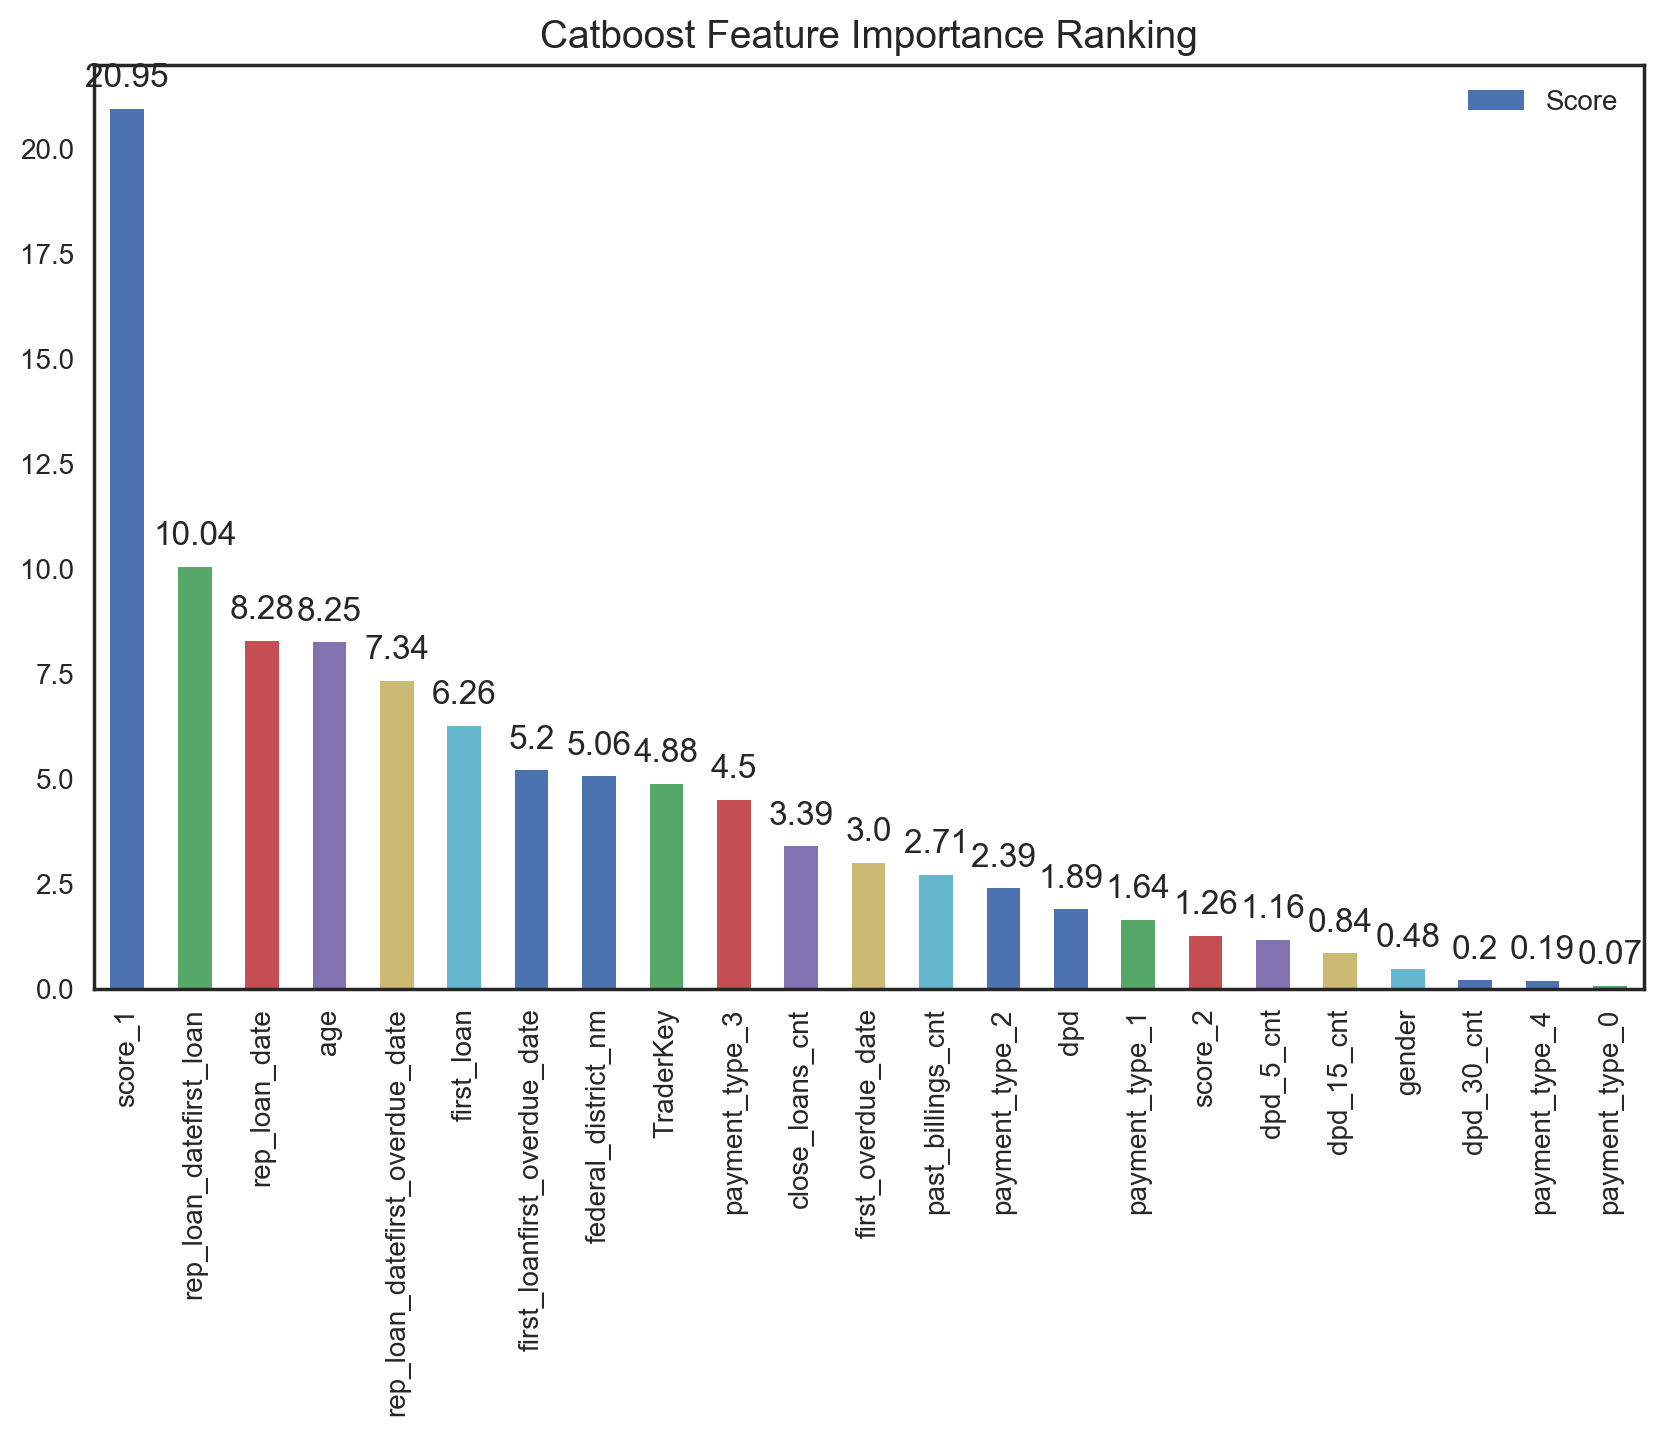

In [20]:
cbmft = CatBoostCustomModel(model=
    CatBoostClassifier(iterations=250,
                       learning_rate=0.2,
                       depth=9,
                       l2_leaf_reg=5,
                       #custom_loss = ['Accuracy'],
                       #loss_function = 'MultiClass',
                        ),
    model_params={"metadata":{"test_value":"value"}} ,
    )

cbmft.fit(train_X
          , train_y
          , fit_params={"logging_level": 'Silent', "plot": False}
          #, n_folds = 3
)
cbmft.get_features_importance(sorted)
cbmft.plot_features_importance()
#list(cbmft.get("model").get_metadata())

In [24]:
cbmft.get_score()

0.952553861050593

In [25]:
cbmft.get_crosstab()

Predict,0.0,1.0,All
GroundTruth,,,
0,3711,8,3719
1,188,224,412
All,3899,232,4131


In [23]:
from sklearn.externals import joblib
joblib.dump(cbmft, '../../models/scoring_model.joblib') 

['../../models/scoring_model.joblib']